In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [20]:
df = pd.read_csv("diabetes.csv")
df.head()

# buradaki verilerle  şeker hastlığı oluğ olmayacağımızı    model  geliştireceğiz

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [21]:
df.shape

(768, 9)

 ## Exploratory Data Analysis and Visualization

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [24]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [25]:
df.Outcome.value_counts(normalize = True)

0   0.651
1   0.349
Name: Outcome, dtype: float64

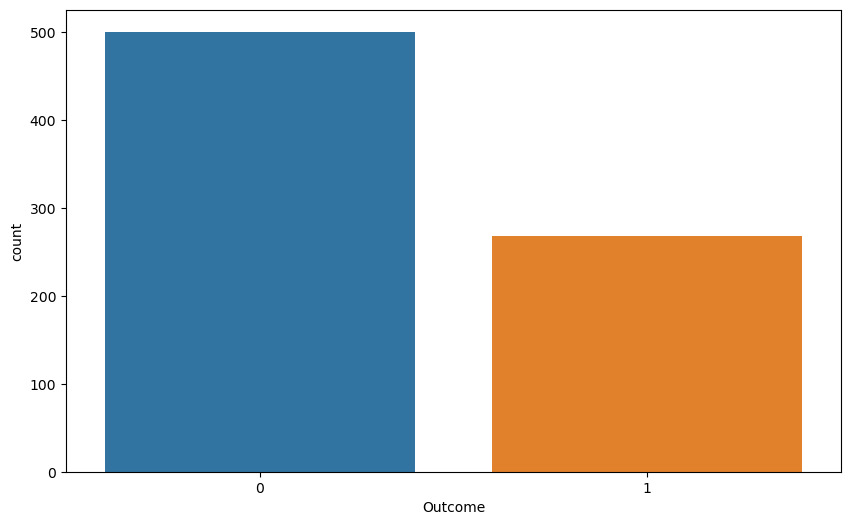

In [26]:
sns.countplot(df.Outcome)
plt.show()

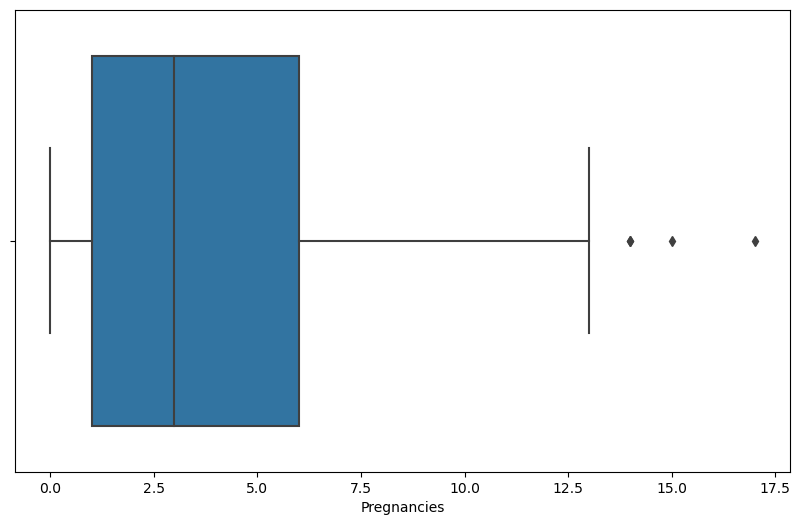

In [27]:
sns.boxplot(df.Pregnancies)
plt.show()

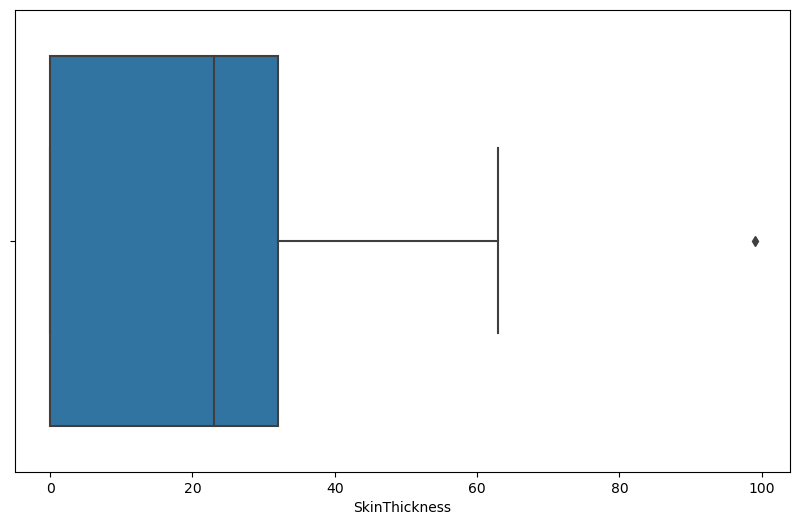

In [28]:
sns.boxplot(df.SkinThickness)
plt.show()

In [29]:
df = df[df.SkinThickness<70]

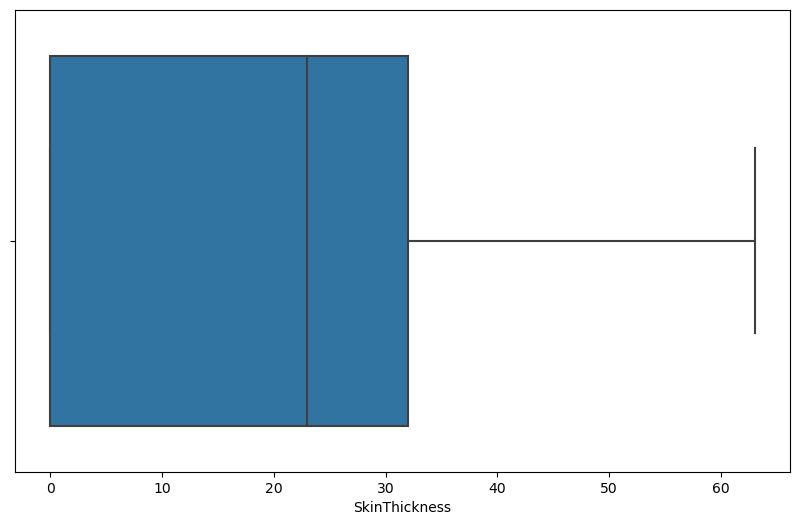

In [30]:
sns.boxplot(df.SkinThickness)
plt.show()

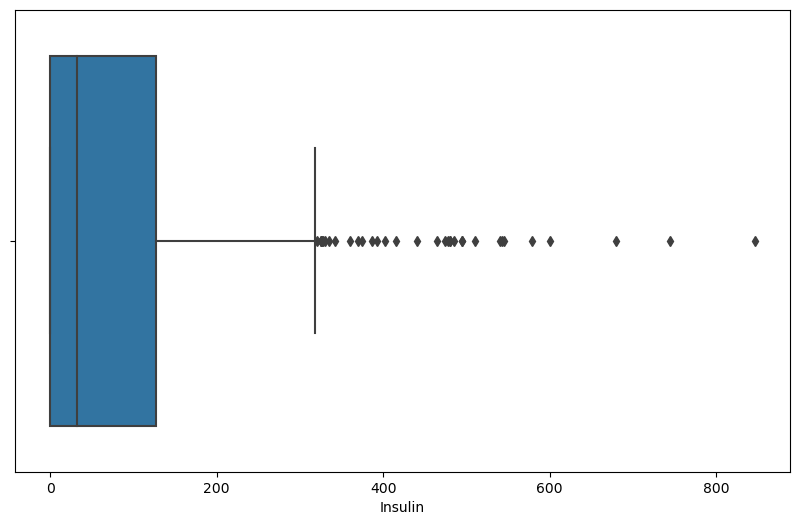

In [31]:
sns.boxplot(df.Insulin);

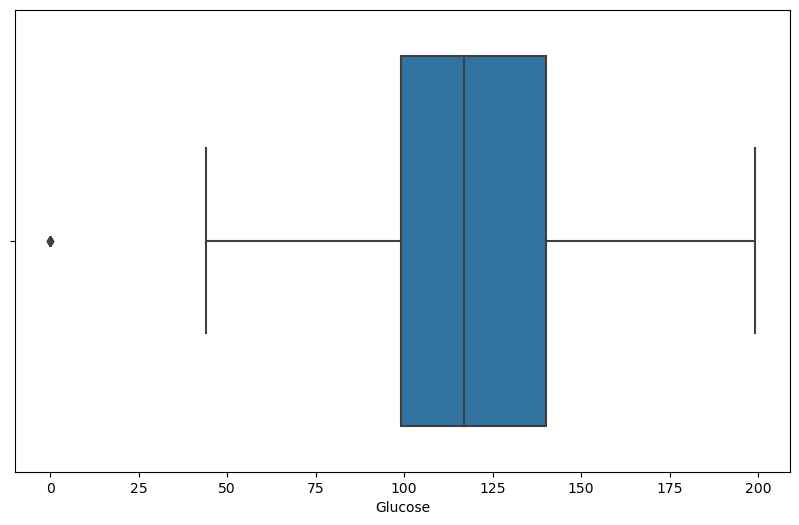

In [36]:
sns.boxplot(df.Glucose);

In [37]:
df=df[df.Glucose>0]

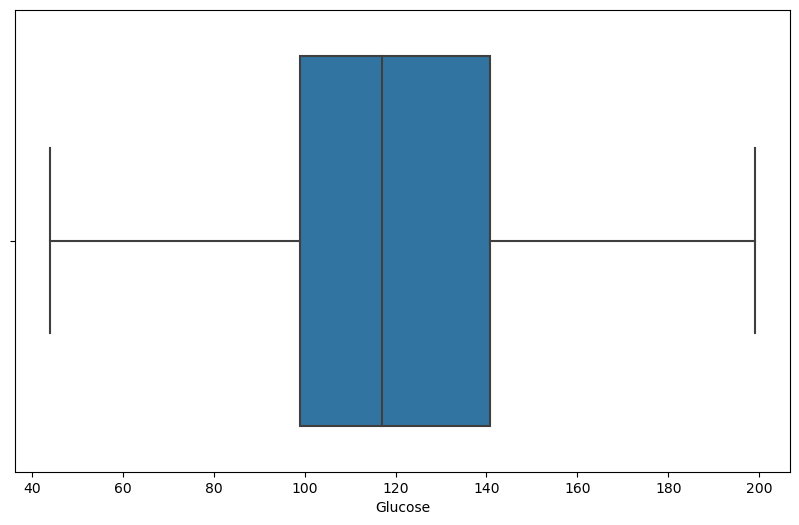

In [38]:
sns.boxplot(df.Glucose);

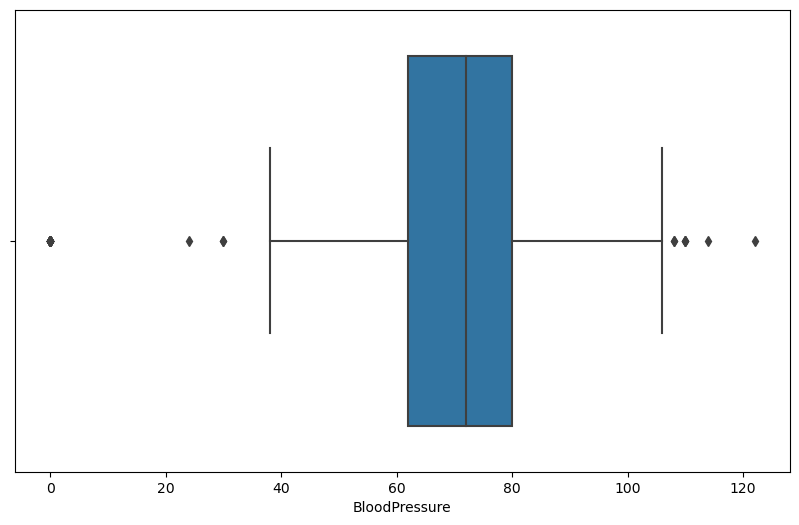

In [39]:
sns.boxplot(df.BloodPressure)
plt.show()

In [44]:
df = df[df.BloodPressure>35]

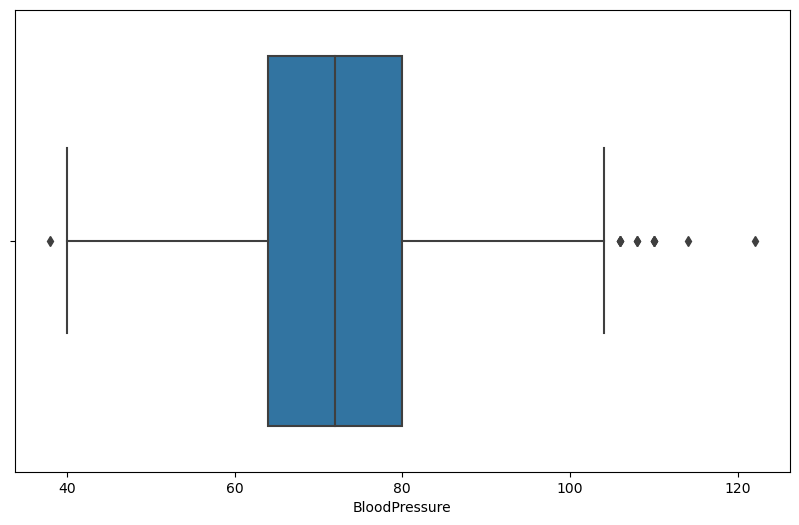

In [45]:
sns.boxplot(df.BloodPressure)
plt.show()

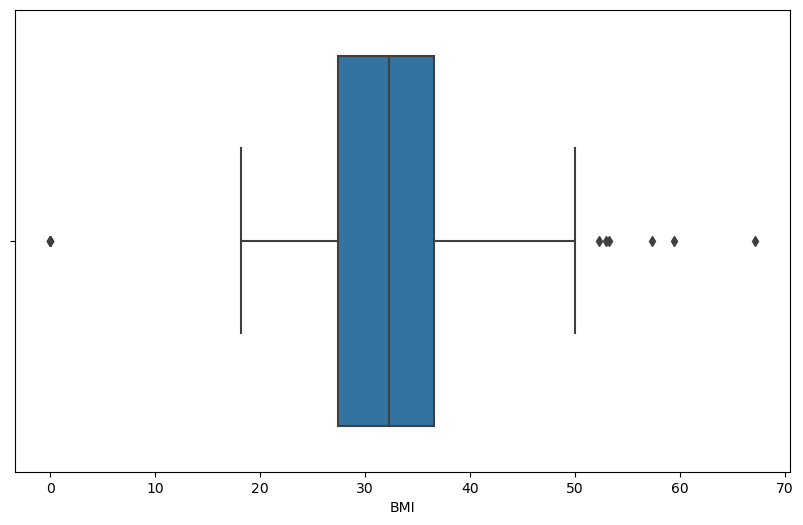

In [42]:
sns.boxplot(df.BMI);

In [43]:
df.shape

(724, 9)

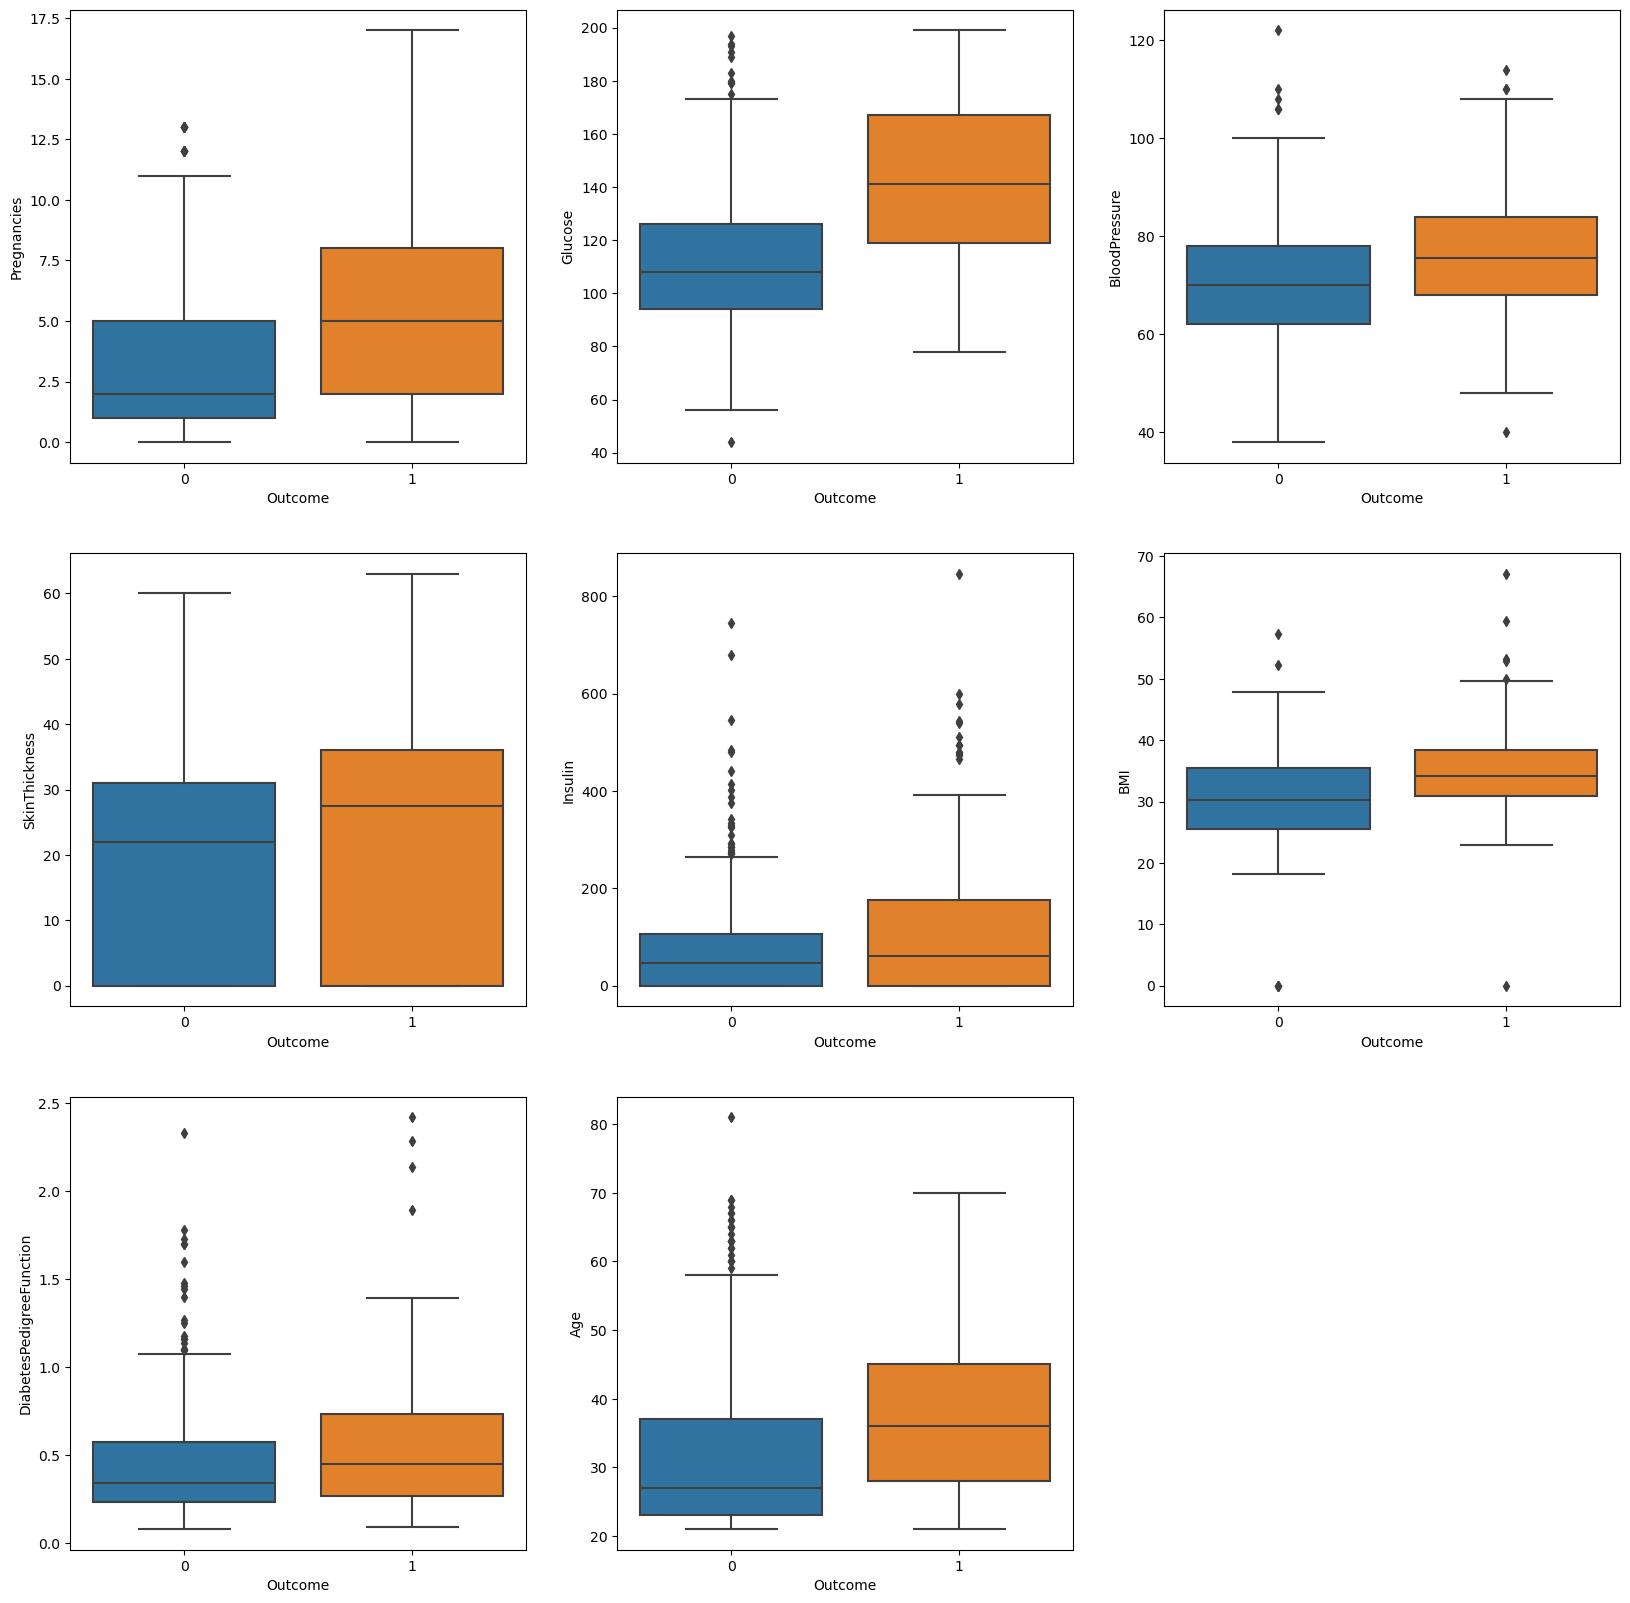

In [46]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=df)
plt.show()

## Multicollinearty

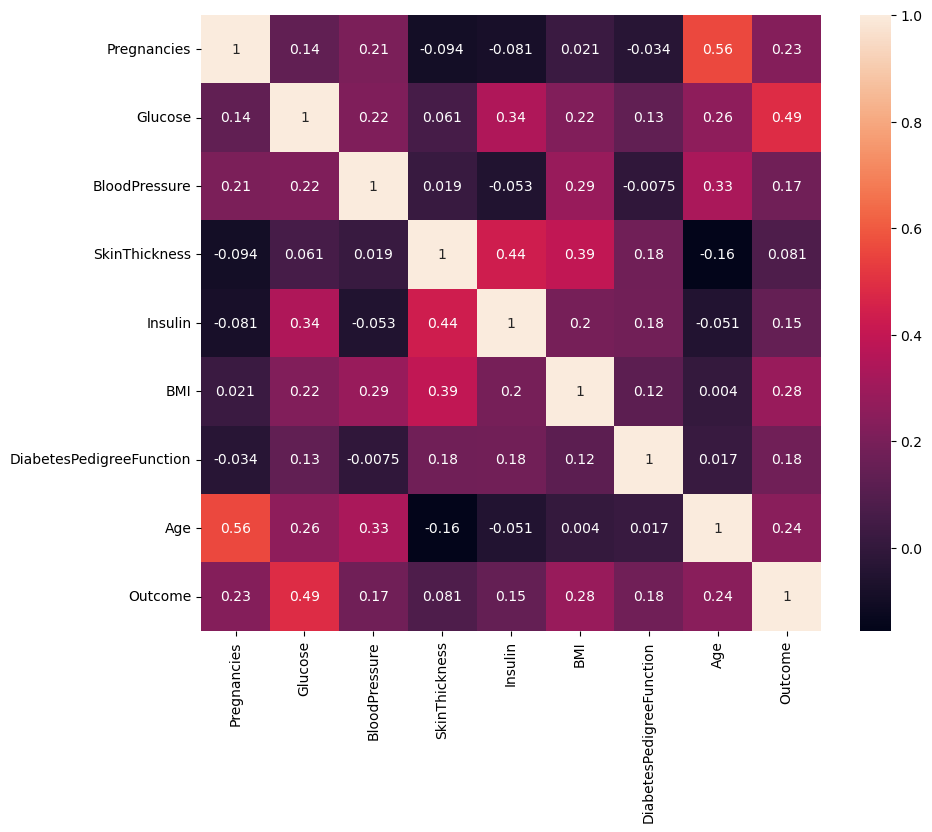

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
# burada lasso ridge  yok    içine gömülü  linearde  kendimiz  yapyorduk  

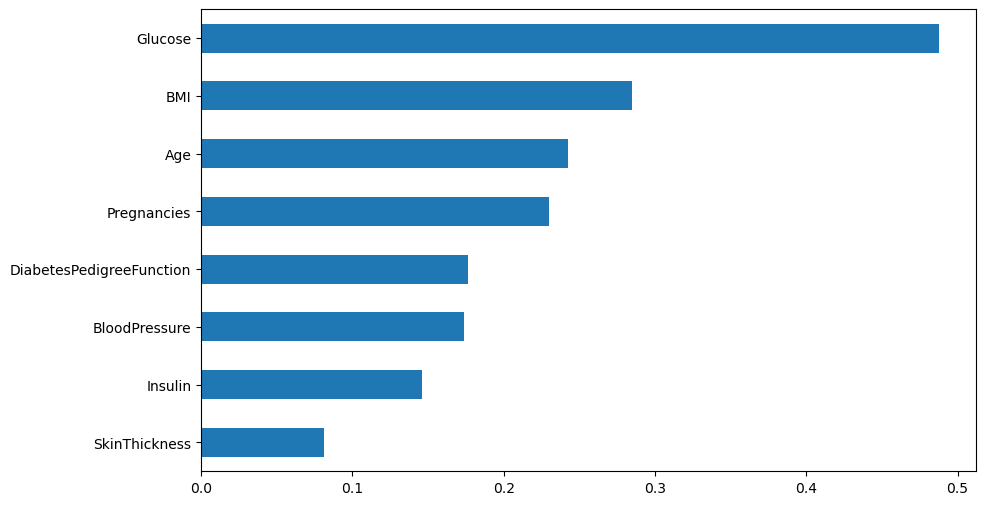

In [48]:
df.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()

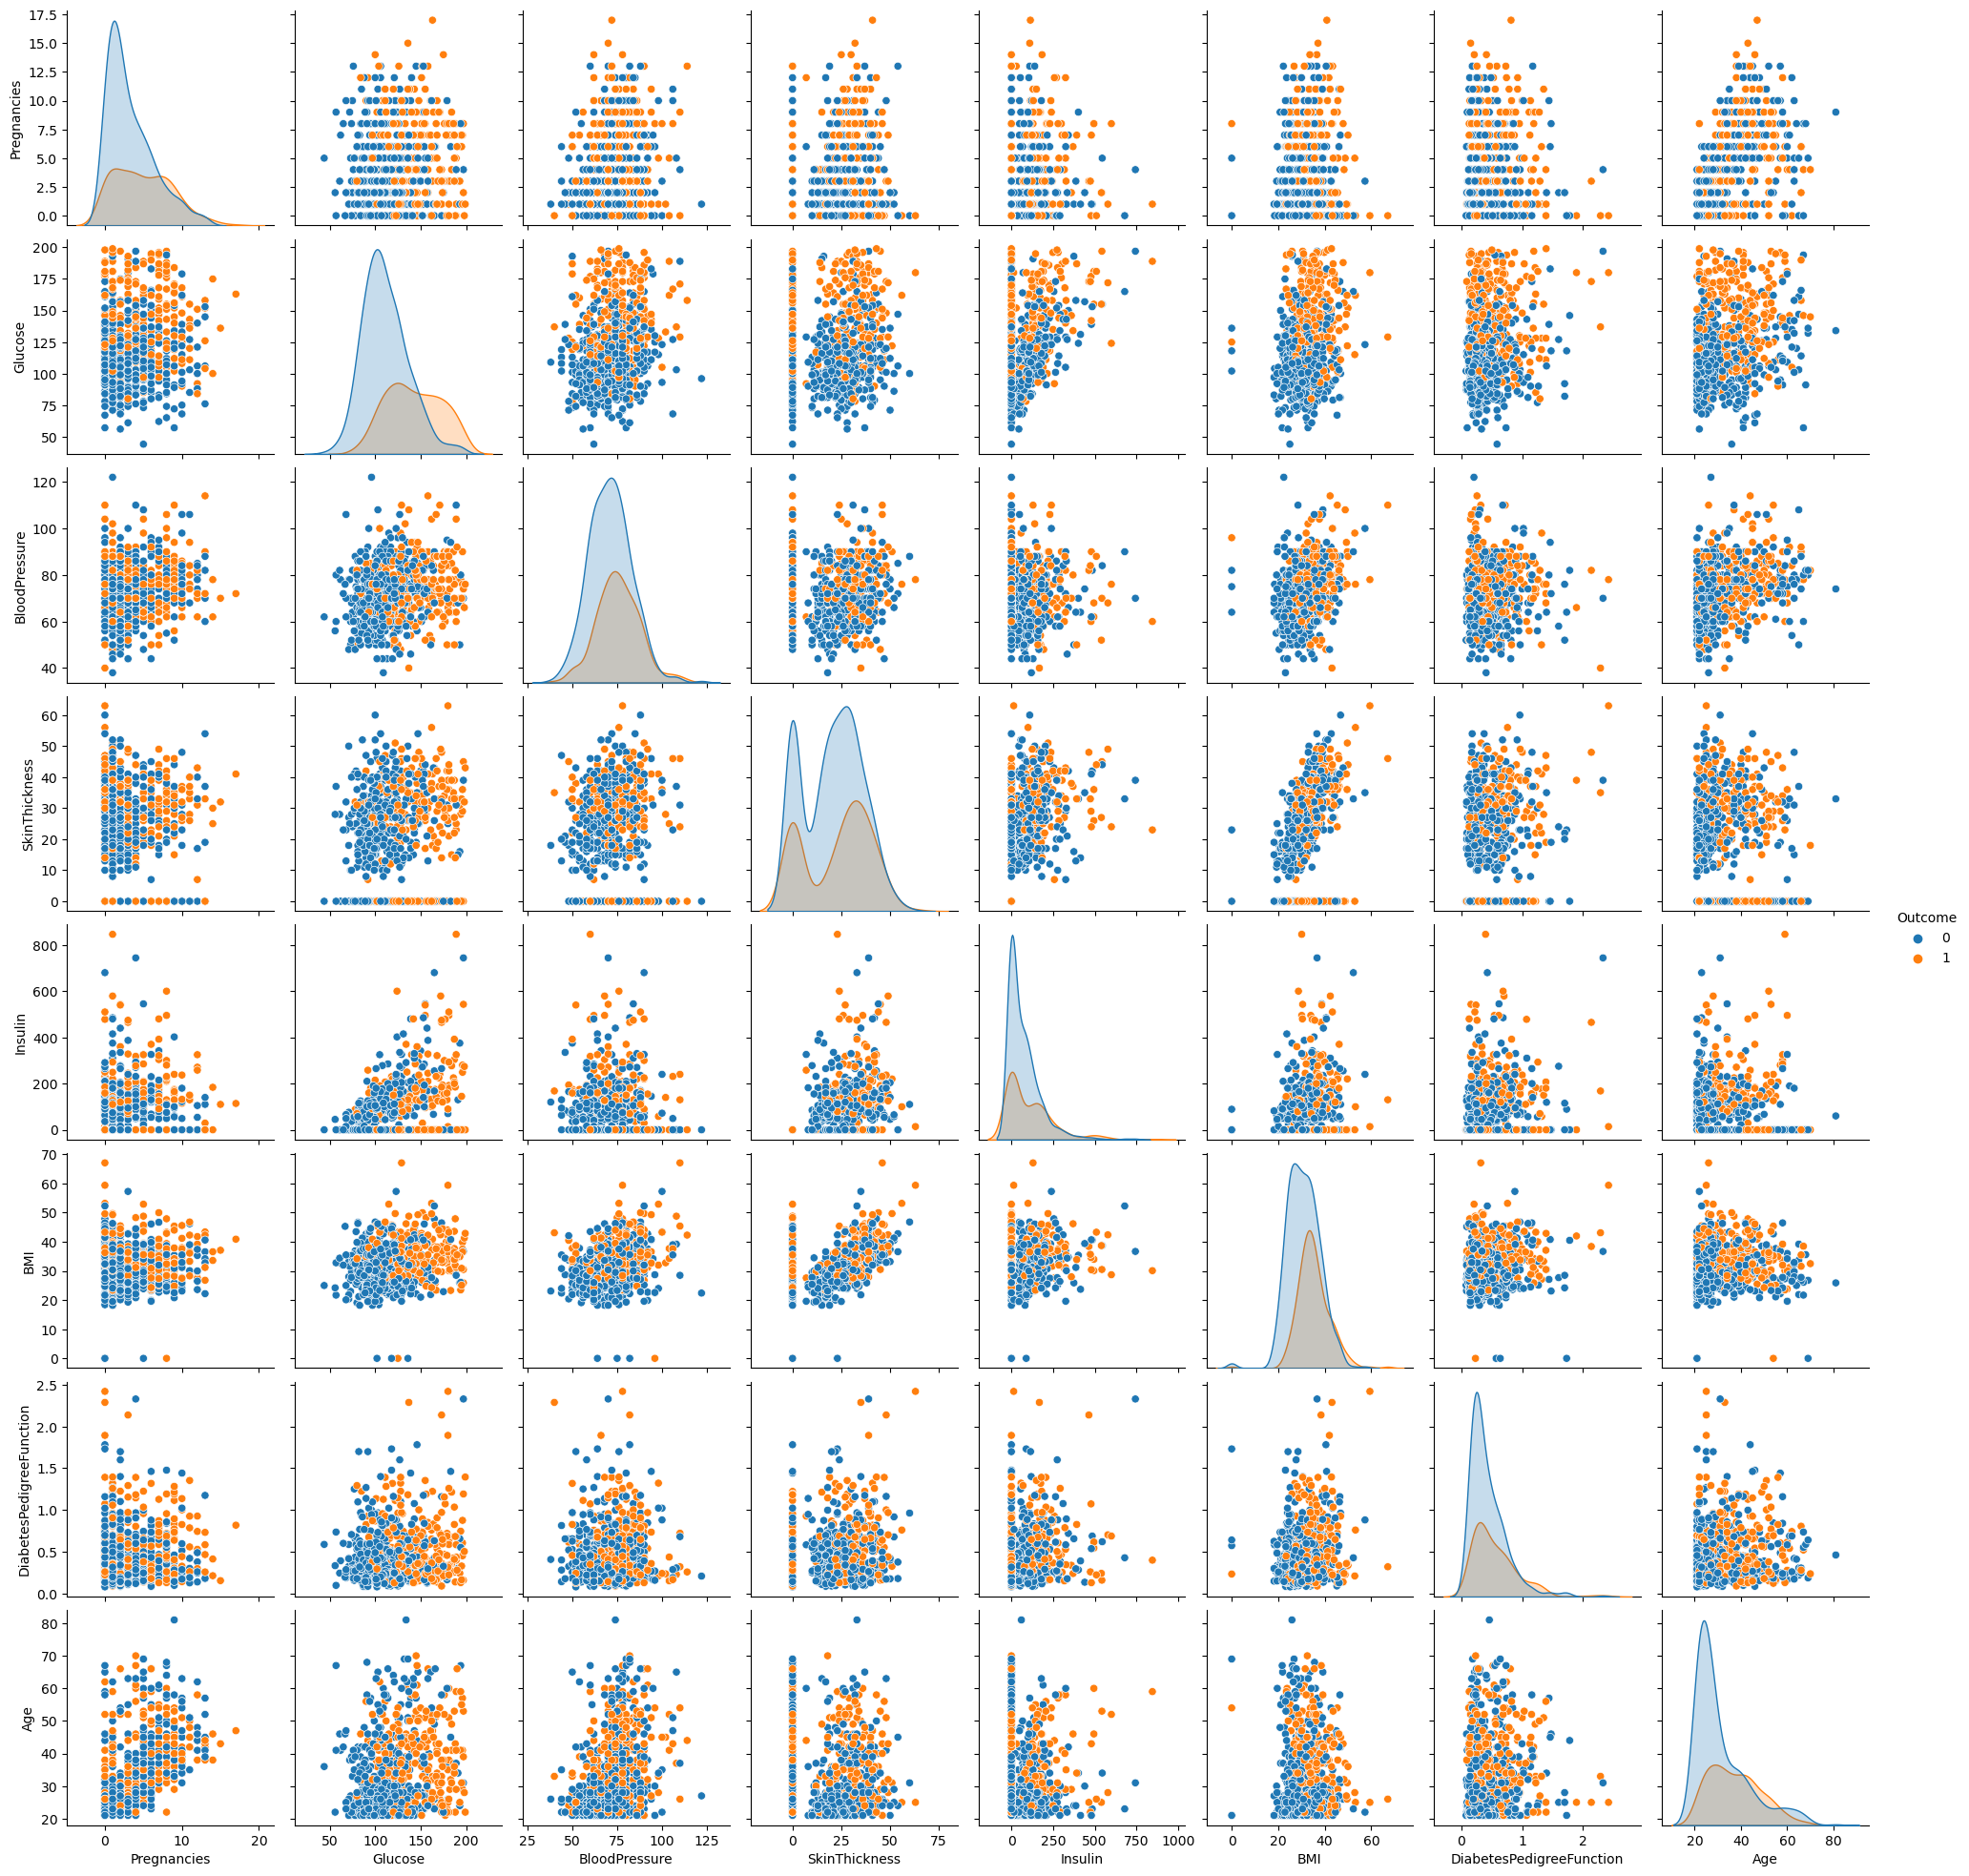

In [49]:
sns.pairplot(df, hue = "Outcome");

##  Train | Test Split and Scaling